<a href="https://colab.research.google.com/github/JaiswalFelipe/Optimization-Project/blob/main/OptimizationP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial imports and data load

ref: 
- https://www.kaggle.com/datasets/neelkamal692/delhi-house-price-prediction?resource=download

- https://www.mygreatlearning.com/blog/mean-square-error-explained/

MSE unit order is higher than the error unit as the error is squared. To get the same unit order, many times the square root of MSE is taken. It is called the Root Mean Squared Error (RMSE).

RMSE = SQRT(MSE)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
delhi_raw = pd.read_csv('/content/drive/MyDrive/OptiData/MagicBricks.csv')
delhi_raw.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


# EDA

In [3]:
#Stats
delhi_raw.describe(include='all')

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1254,1259,1226.000000,1.259000e+03,1259,1259,1254,1018.000000
unique,NaN,NaN,NaN,3,365,NaN,NaN,2,2,2,NaN
top,NaN,NaN,NaN,Semi-Furnished,Lajpat Nagar 3,NaN,NaN,Ready_to_move,Resale,Builder_Floor,NaN
freq,NaN,NaN,NaN,708,34,NaN,NaN,1184,781,661,NaN
mean,1466.452724,2.796664,2.556086,NaN,NaN,1.935563,2.130670e+07,NaN,NaN,NaN,15690.136542
std,1568.055040,0.954425,1.042220,NaN,NaN,6.279212,2.560115e+07,NaN,NaN,NaN,21134.738568
min,28.000000,1.000000,1.000000,NaN,NaN,1.000000,1.000000e+06,NaN,NaN,NaN,1259.000000
25%,800.000000,2.000000,2.000000,NaN,NaN,1.000000,5.700000e+06,NaN,NaN,NaN,6364.000000
50%,1200.000000,3.000000,2.000000,NaN,NaN,1.000000,1.420000e+07,NaN,NaN,NaN,11291.500000
75%,1700.000000,3.000000,3.000000,NaN,NaN,2.000000,2.550000e+07,NaN,NaN,NaN,18000.000000


In [4]:
# Check for null values
delhi_raw.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [5]:
delhi_data = delhi_raw.dropna()
delhi_data.shape 

(1005, 11)

##### Select variables

In [6]:
#
Features = ['Area', 'BHK', 'Locality', 'Bathroom', 'Furnishing',
       'Parking', 'Status', 'Transaction',
       'Type', 'Per_Sqft', 'Price']

# New data
delhi_data = delhi_data[Features]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f43e7004a50>,
      dtype=object)

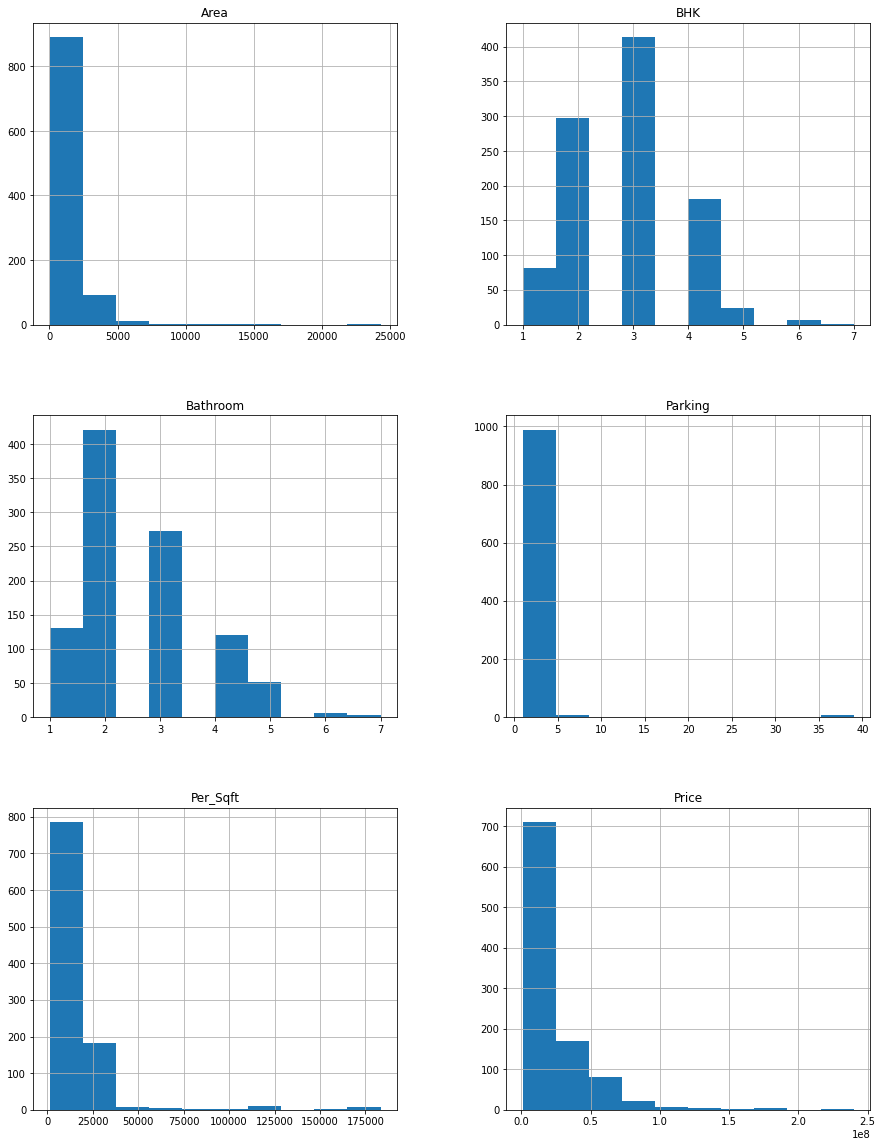

In [7]:
delhi_data.hist(figsize = (15,20))

Locality


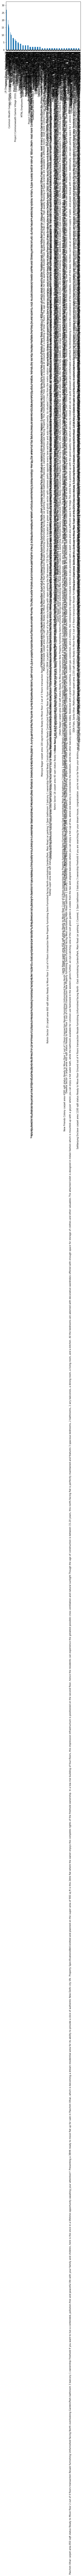

Furnishing


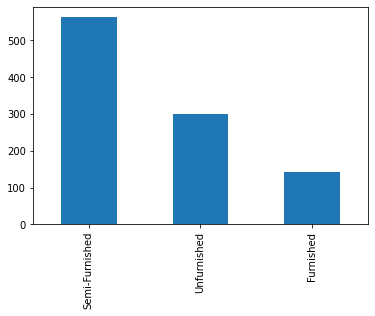

Status


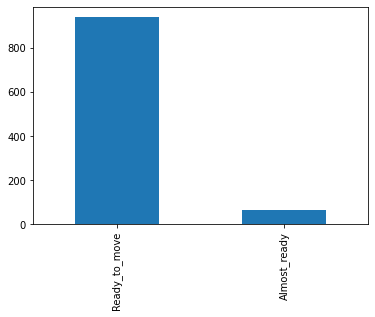

Transaction


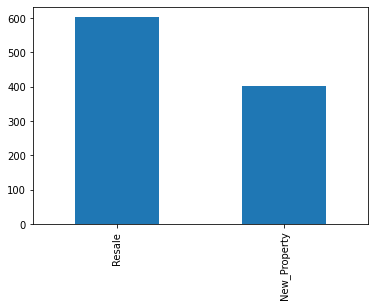

Type


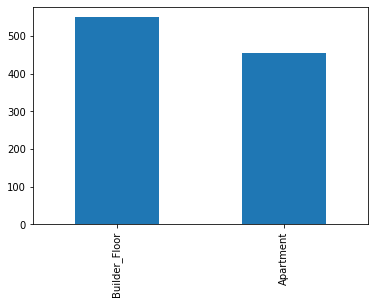

In [8]:
# this will list the non-numeric columns...

# so loop over all of them; count each unique value, and plot...
for col in delhi_data.select_dtypes(include=object).columns: 
    print(col)
    delhi_data[col].value_counts().plot(kind='bar')
    plt.show()

# Data Prep

### Data cleaning

##### Numerical data

In [9]:
# Max Area
#delhi_data = delhi_data.loc[delhi_raw['Area'] <= 5000]

In [10]:
# Max BHK
#delhi_data = delhi_data.loc[delhi_data['BHK'] <= 5]

In [11]:
# Max Parking slots
#delhi_data = delhi_data.loc[delhi_data['Parking'] <= 5]

In [12]:
# Max Bathrooms
#delhi_data = delhi_data.loc[delhi_data['Bathroom'] <= 5]

In [13]:
# Max Per_Sqft
#delhi_data = delhi_data.loc[delhi_data['Per_Sqft'] <= 30000]

In [14]:
# Max Price 50mil
#delhi_data = delhi_data.loc[delhi_data['Price'] <= 50000000]

In [15]:
# Final data 
#delhi_data.shape

##### Encode categorical variables

In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

delhi_data["Furnishing"] = encoder.fit_transform(delhi_data["Furnishing"].astype('str'))
delhi_data["Locality"] = encoder.fit_transform(delhi_data["Locality"].astype('str'))
delhi_data["Status"] = encoder.fit_transform(delhi_data["Status"])
delhi_data["Transaction"] = encoder.fit_transform(delhi_data["Transaction"])
delhi_data["Type"] = encoder.fit_transform(delhi_data["Type"].astype('str'))
delhi_data.head()

,Area,BHK,Locality,Bathroom,Furnishing,Parking,Status,Transaction,Type,Per_Sqft,Price
1,750.0,2,111,2.0,1,1.0,1,0,0,6667.0,5000000
2,950.0,2,42,2.0,0,1.0,1,1,0,6667.0,15500000
3,600.0,2,233,2.0,1,1.0,1,1,1,6667.0,4200000
4,650.0,2,234,2.0,1,1.0,1,0,1,6667.0,6200000
5,1300.0,4,233,3.0,1,1.0,1,0,1,6667.0,15500000


In [17]:
delhi_data = delhi_data.drop_duplicates()
delhi_data.shape

(936, 11)

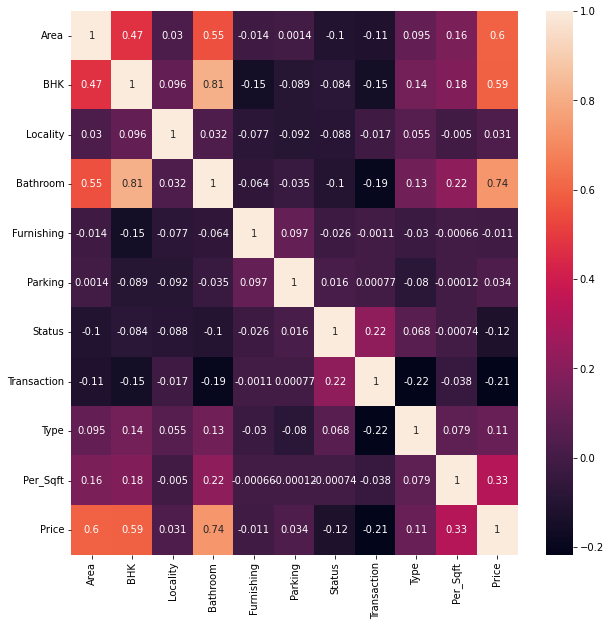

In [18]:
import seaborn as sns

plt.subplots(figsize=(10,10))
sns.heatmap(delhi_data.corr(),annot=True)

In [19]:
# Furnishing and parking have very low correlation to price
# We know that location matters so we hold locality
selected_features = ['Area', 'BHK','Locality', 'Bathroom',
                     'Status', 'Transaction', 'Type', 'Per_Sqft']

delhi_data[selected_features].head()      

,Area,BHK,Locality,Bathroom,Status,Transaction,Type,Per_Sqft
1,750.0,2,111,2.0,1,0,0,6667.0
2,950.0,2,42,2.0,1,1,0,6667.0
3,600.0,2,233,2.0,1,1,1,6667.0
4,650.0,2,234,2.0,1,0,1,6667.0
5,1300.0,4,233,3.0,1,0,1,6667.0


### Final prep

In [20]:
# Mapping
from sklearn.preprocessing import StandardScaler

df_copy = delhi_data.copy()
X = df_copy[selected_features]
y = df_copy['Price']

# Scaling
ss_scaler = StandardScaler()

X = ss_scaler.fit_transform(X)

print(X[0])

[-0.4467425  -0.80816218 -0.53569448 -0.52093565  0.24005649 -1.25356634
 -1.15506043 -0.41859891]


In [21]:
# Train/test split
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

#df_train = df_copy.sample(frac=0.70, random_state=1)
#df_test = df_copy.drop(df_train.index)
#print(len(df_train))
#print(len(df_test))

print(len(X_train))
print(len(X_val))
print(len(X_test))

673
75
188


# Modelling

##### Without tuning

In [22]:
# Initial model
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

lr = LinearRegression()

kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)
cv_results = model_selection.cross_val_score(lr, X_train, y_train, cv=kfold, scoring='r2')

cv_results.mean()

0.5555069802688516

In [23]:
# Fit initial model
lr.fit(X_train, y_train)

# Evaluate
from sklearn import metrics

predlr = lr.predict(X_test)
print("r2:", metrics.r2_score(y_test, predlr))

r2: 0.5357081918428779


##### Genetic algorithm for Hyperparameter tuning

In [ ]:
!pip install tpot

In [25]:
from tpot import TPOTRegressor

tpot = TPOTRegressor(generations=25, population_size=50, verbosity=2, scoring='r2')
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/1300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7632413306177824

Generation 2 - Current best internal CV score: 0.7763716973927017

Generation 3 - Current best internal CV score: 0.7892332358325643

Generation 4 - Current best internal CV score: 0.7892332358325643

Generation 5 - Current best internal CV score: 0.7929048870526347

Generation 6 - Current best internal CV score: 0.8057913029916325

Generation 7 - Current best internal CV score: 0.8057913029916325

Generation 8 - Current best internal CV score: 0.8057913029916325

Generation 9 - Current best internal CV score: 0.8085072029084678

Generation 10 - Current best internal CV score: 0.8085072029084678

Generation 11 - Current best internal CV score: 0.8092313638175309

Generation 12 - Current best internal CV score: 0.8092313638175309

Generation 13 - Current best internal CV score: 0.8192996239513881

Generation 14 - Current best internal CV score: 0.8192996239513881

Generation 15 - Current best internal CV score: 0.819299

TPOTRegressor(generations=25, population_size=50, scoring='r2', verbosity=2)

Best pipeline: GradientBoostingRegressor(SelectPercentile(XGBRegressor(input_matrix, learning_rate=0.001, max_depth=8, min_child_weight=20, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.8500000000000001, verbosity=0), percentile=67), alpha=0.85, learning_rate=0.1, loss=lad, max_depth=6, max_features=0.6500000000000001, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=0.8)

Execution Time: 1:24:12

# Evaluation

In [32]:
# Using test data
print(tpot.score(X_test, y_test))

0.8570751559215934


In [33]:
# We can also use validation data since we never used it on training
print(tpot.score(X_val, y_val))
tpot.export('tpot_delhi_pipeline.py')

0.8506549600831181


# Save, load, predict

In [31]:
print(tpot.export())

import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from xgboost import XGBRegressor

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=None)

# Average CV score on the training set was: 0.8253125013188181
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=XGBRegressor(learning_rate=0.001, max_depth=8, min_child_weight=20, n_estimators=100, n_jobs=1, objective="reg:squarederror", subsample=0.8500000000000001, ve

In [34]:
delhi_data[selected_features].describe(include='all')

,Area,BHK,Locality,Bathroom,Status,Transaction,Type,Per_Sqft
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,1481.921451,2.780983,156.545940,2.572650,0.945513,0.611111,0.571581,15790.613248
std,1639.227844,0.966886,85.067686,1.099859,0.227098,0.487759,0.495114,21807.249640
min,28.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1259.000000
25%,750.000000,2.000000,91.750000,2.000000,1.000000,0.000000,0.000000,6444.250000
50%,1136.500000,3.000000,147.000000,2.000000,1.000000,1.000000,1.000000,11111.000000
75%,1700.000000,3.000000,233.000000,3.000000,1.000000,1.000000,1.000000,18000.000000
max,24300.000000,7.000000,303.000000,7.000000,1.000000,1.000000,1.000000,183333.000000


In [36]:
# Sample 1
sample_data = {'Area': [2000], 'BHK': [2], 'Locality': [2], 
               'Bathroom': [2], 'Status': [1], 'Transaction': [1],
               'Type': [0], 'Per_Sqft': [20000]}

test_sample = pd.DataFrame(data = sample_data)

In [38]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from xgboost import XGBRegressor

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
#tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
#features = tpot_data.drop('target', axis=1)
#training_features, testing_features, training_target, testing_target = \
#            train_test_split(features, tpot_data['target'], random_state=None)

# Average CV score on the training set was: 0.8253125013188181
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=XGBRegressor(learning_rate=0.001, max_depth=8, min_child_weight=20, n_estimators=100, n_jobs=1, objective="reg:squarederror", subsample=0.8500000000000001, verbosity=0)),
    SelectPercentile(score_func=f_regression, percentile=67),
    GradientBoostingRegressor(alpha=0.85, learning_rate=0.1, loss="lad", max_depth=6, max_features=0.6500000000000001, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=0.8)
)

exported_pipeline.fit(X_train, y_train)
#exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(test_sample)
results

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,


array([1.34150797e+08])

price: 134,150,797 Indian rupees

In [39]:
# Check localities
delhi_raw.Locality.unique()

array(['Rohini Sector 25', 'J R Designers Floors, Rohini Sector 24',
       'Citizen Apartment, Rohini Sector 13', 'Rohini Sector 24',
       'Rohini Sector 24 carpet area 650 sqft status Ready to Move floor 4 out of 4 floors transaction New Property furnishing Semi-Furnished facing East overlooking Garden/Park, Main Road car parking 1 Open bathroom 2 balcony 1 ownership Freehold Newly Constructed Property Newly Constructed Property East Facing Property 2BHK Newly build property for Sale. A House is waiting for a Friendly Family to make it a lovely home.So please come and make his house feel alive once again. read more Contact Agent View Phone No. Share Feedback Garima properties Certified Agent Trusted by Users Genuine Listings Market Knowledge',
       'Delhi Homes, Rohini Sector 24', 'Rohini Sector 21',
       'Rohini Sector 22', 'Rohini Sector 20',
       'Rohini Sector 8 How Auctions work? The borrower has the physical possession of the Property. However the lender (Bank) can lega

In [44]:
# Sample 2
sample_data2 = {'Area': [5000], 'BHK': [5], 'Locality': [100], 
               'Bathroom': [2], 'Status': [1], 'Transaction': [1],
               'Type': [0], 'Per_Sqft': [30000]}

test_sample2 = pd.DataFrame(data = sample_data2)

In [45]:
results2 = exported_pipeline.predict(test_sample2)
results2

array([1.32562564e+08])

price: 
